<a href="https://colab.research.google.com/github/vanshika7-max/assignments/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:
###You are provided with historical sales data for 45 stores of a Retail chain located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from statistics import mean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Reading the Datasets:**

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Bluepi/sales-prediction/features.csv.zip')
train = pd.read_csv('/content/drive/MyDrive/Bluepi/sales-prediction/train.csv.zip')
stores = pd.read_csv('/content/drive/MyDrive/Bluepi/sales-prediction/stores.csv')
test = pd.read_csv('/content/drive/MyDrive/Bluepi/sales-prediction/test.csv.zip')

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

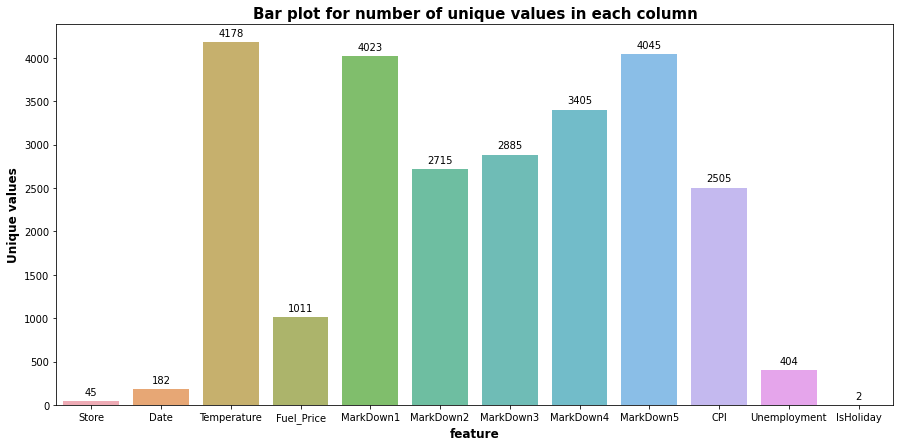

In [ ]:
unique_df = pd.DataFrame()
unique_df['feature'] = features.columns
unique=[]
for i in features.columns:
    unique.append(features[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['feature'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('feature', size=12, weight='bold')
# plt.xticks(rotation=90)
plt.show()

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

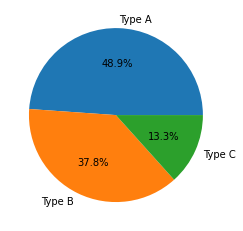

In [ ]:
labels = 'Type A','Type B','Type C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.show()

By boxplot and piechart, we can say that type A store is the largest store and C is the smallest
There is no overlapped area in size among A, B, and C.

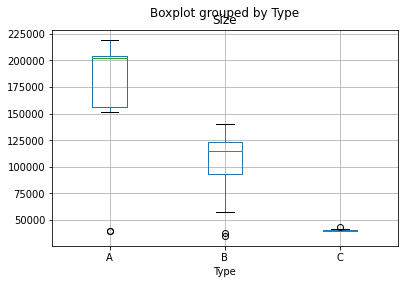

In [ ]:
stores.boxplot(by ='Type', column =['Size'], grid = True)

In [ ]:
stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


#Plotting the target column

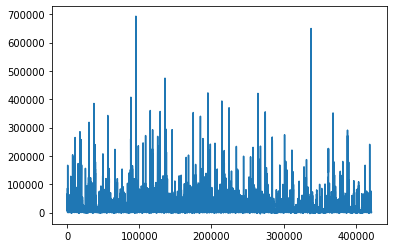

In [ ]:
plt.plot(train.Weekly_Sales)

Merging train, features, stores on common columns for weekly sales and features like temperature and fuel price

In [ ]:
def merge(df,features,stores):
  df1=pd.merge(df,features,on=['Store','Date','IsHoliday'],how='inner')
  df1=pd.merge(df1,stores,on='Store',how='inner')

  return df1


In [ ]:
Data_train = merge(train,features,stores)
Data_test = merge(test,features,stores)

In [ ]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


As the data is Time-Series we sort them in ascending order so that the model can perform on the historical data.

In [ ]:
Data_train = Data_train.sort_values(by='Date')
Data_test = Data_test.sort_values(by='Date')

Checking for null values

In [ ]:
Data_train.isna().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [ ]:
Data_test.isna().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.129493
MarkDown2       24.879198
MarkDown3        8.542203
MarkDown4       11.200723
MarkDown5        0.000000
CPI             33.165890
Unemployment    33.165890
Type             0.000000
Size             0.000000
dtype: float64

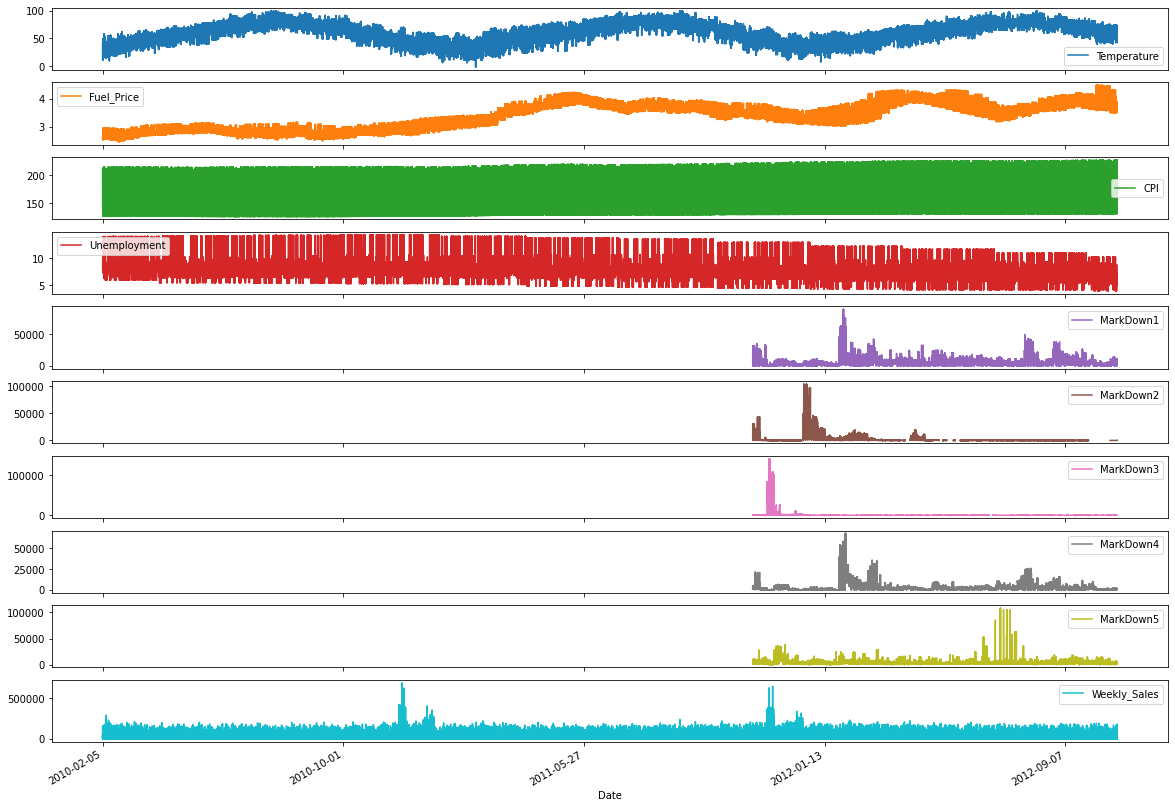

In [ ]:
Data_train[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']].plot(x='Date', subplots=True, figsize=(20,15));

### If we see we have more than 65% null values for some of the features which looks more alike so it could be better if we will keep only one features of this and drop the other similiar features.


As expected, temperature has high seasonality. Week and month column can effectively cover its effect.

Fuel price and CPI show an upward trend and unemployment shows downward trend.

Let's explore effect of these feature with weekly sales.
Label encoding is done for the IsHoliday and Type feature. From EDA, I concluded to drop CPI, unemployment and fuel price and all the 'markdown' columns.

Training Data is missing for January in 2010, November and December in 2012.There are weeks when Sales peaks in the festive months of November and December.Also seems like there is a dip in September - October leading towards the holiday weeks

We are keeping only Markdown1

In [ ]:
def average(df):
  df['Mean_Of_U_CPI'] = df['Unemployment'] + df['CPI']
  return df

In [ ]:
Data_train = average(Data_train)
Data_test = average(Data_test)

In [ ]:
def drop_columns(df):
  df = df.drop(['MarkDown2','MarkDown4','MarkDown3','MarkDown5','CPI','Unemployment'],axis=1)
  return df

In [ ]:
Data_train = drop_columns(Data_train)
Data_test = drop_columns(Data_test)

In [ ]:
Data_train.isna().mean()*100

Store             0.000000
Dept              0.000000
Date              0.000000
Weekly_Sales      0.000000
IsHoliday         0.000000
Temperature       0.000000
Fuel_Price        0.000000
MarkDown1        64.257181
Type              0.000000
Size              0.000000
Mean_Of_U_CPI     0.000000
dtype: float64

In [ ]:
Data_train['MarkDown1'].value_counts()

1.50       102
460.73     102
175.64      93
5924.71     75
1282.42     75
          ... 
318.51      42
196.40      42
243.47      42
945.96      42
187.88      42
Name: MarkDown1, Length: 2277, dtype: int64

In [ ]:
Data_train.fillna(Data_train['MarkDown1'].mean(),inplace=True)
Data_test.fillna(Data_test['MarkDown1'].mean(),inplace=True)
Data_test.fillna(Data_test['Mean_Of_U_CPI'].mean(),inplace=True)

In [ ]:
Data_train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,Type,Size,Mean_Of_U_CPI
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7246.420196,A,151315,219.202358
330761,35,3,2010-02-05,14612.19,False,27.19,2.784,7246.420196,B,103681,144.614461
330762,35,4,2010-02-05,26323.15,False,27.19,2.784,7246.420196,B,103681,144.614461
330763,35,5,2010-02-05,36414.63,False,27.19,2.784,7246.420196,B,103681,144.614461
330764,35,6,2010-02-05,11437.81,False,27.19,2.784,7246.420196,B,103681,144.614461


#Feature Engineering

In [ ]:
def time_features(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = pd.to_datetime(df['Date']).dt.year
  df['Month'] = pd.to_datetime(df['Date']).dt.month
  df['Week'] = pd.to_datetime(df['Date']).dt.week
  df['DayOfTheWeek'] = df['Date'].dt.dayofweek
  df['Day'] = pd.to_datetime(df['Date']).dt.day
  df['Qtr'] = df.Date.dt.quarter
  df.replace({'A': 1, 'B': 2,'C':3},inplace=True)
  return df


In [ ]:
Data_train = time_features(Data_train)
Data_test = time_features(Data_test)

In [ ]:
Data_train.DayOfTheWeek.value_counts()

4    421570
Name: DayOfTheWeek, dtype: int64

In [ ]:
Data_test.DayOfTheWeek.value_counts()

4    115064
Name: DayOfTheWeek, dtype: int64

### Since the column DayOfTheWeek has the Unique value in both train and test dataset, so it redundent column becuase it not giving any relevent information so we can drop this features.

In [ ]:
Data_test = Data_test.drop('DayOfTheWeek', axis = 1)
Data_train = Data_train.drop('DayOfTheWeek', axis = 1)

##Checking for the outliers:

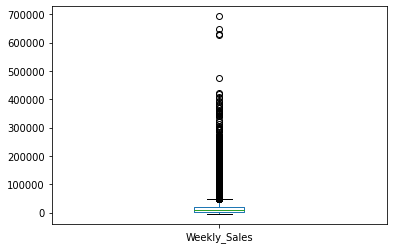

In [ ]:
Data_train['Weekly_Sales'].plot.box()

### It's expected as we can assume that for some of the day we have much higher sale due to some festivals

Store              AxesSubplot(0.125,0.657941;0.133621x0.222059)
Dept            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Weekly_Sales     AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Temperature     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Fuel_Price      AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Type               AxesSubplot(0.125,0.391471;0.133621x0.222059)
Size            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

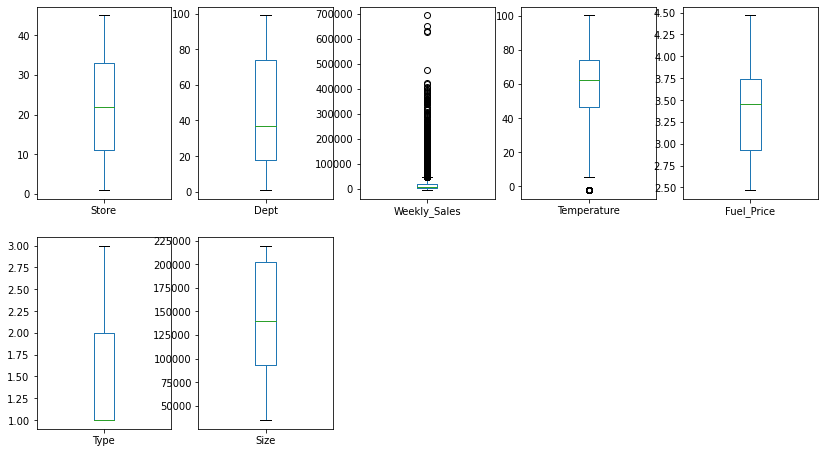

In [ ]:
Data_train[['Store', 'Dept', 'Weekly_Sales', 'Temperature','Fuel_Price','Type', 'Size']].plot(kind='box',subplots=1,layout=(3,5),figsize=(14,12))

### Since this is a time series problem, we can have 3 components that affect the data, besides our original features:

### Trend: are the values growing in time?
Periodic Fluctuations: do we have some behaviors that happen every month, week, period?
Random or Irregular movements: some things can not be predicted and they could affect our response. Maybe we had hearthquakes or a flood that could affect our results.

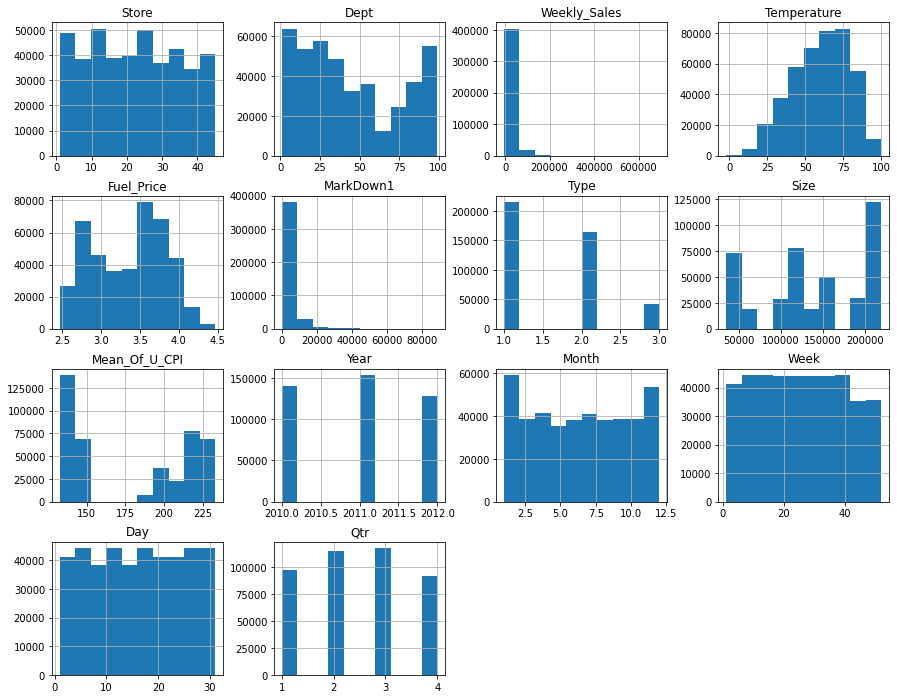

In [ ]:
def hist_plot(Data_train):
    df_plot=Data_train[Data_train.describe().columns]
    df_plot.hist(grid=True,figsize=(15,12))
    plt.show()
hist_plot(Data_train)

### We can see that the 3rd Quarter has the highest sale.

We can merge store and department into one column




In [ ]:
Data_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,Type,Size,Mean_Of_U_CPI,Year,Month,Week,Day,Qtr
0,1,1,2012-11-02,False,55.32,3.386,6766.44,1,151315,230.035779,2012,11,44,2,4
37648,15,74,2012-11-02,False,47.36,3.970,4565.57,2,123737,146.614710,2012,11,44,2,4
37647,15,72,2012-11-02,False,47.36,3.970,4565.57,2,123737,146.614710,2012,11,44,2,4
37646,15,71,2012-11-02,False,47.36,3.970,4565.57,2,123737,146.614710,2012,11,44,2,4
37645,15,67,2012-11-02,False,47.36,3.970,4565.57,2,123737,146.614710,2012,11,44,2,4


In [ ]:
def new_feature(df):
  df["Store_dept"]=df['Store'].astype(str)+ str('_')+df['Dept'].astype(str)
  return df

Data_train = new_feature(Data_train)
Data_test = new_feature(Data_test)

In [ ]:
Data_train.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data_train['IsHoliday'] = le.fit_transform(Data_train['IsHoliday'])
Data_test['IsHoliday'] = le.fit_transform(Data_test['IsHoliday'])

In [ ]:
Data_train.IsHoliday.value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

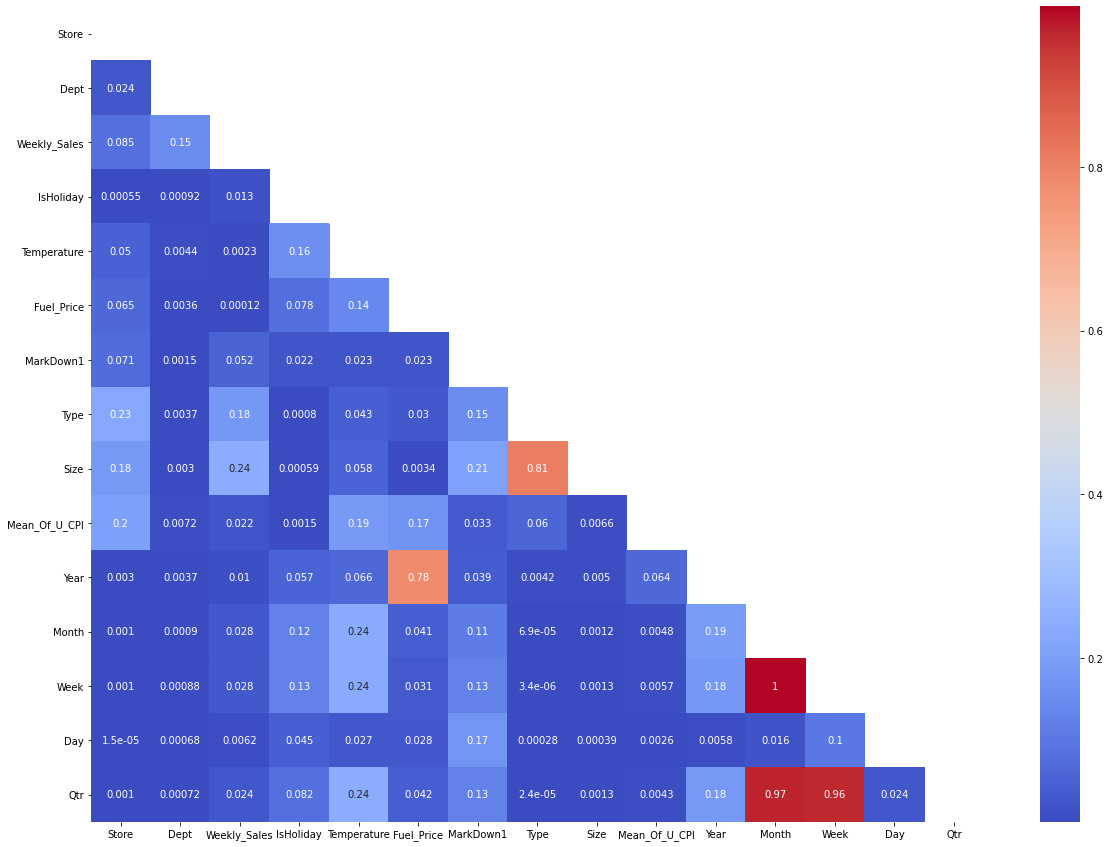

In [ ]:
# Plotting correlation between all important features
plt.figure(figsize=(20,15))
cor=Data_train.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask,annot=True,cmap='coolwarm')

From the above bar plot, we can observed that Department have high importance compared to other features. Size and Store are next importance features.

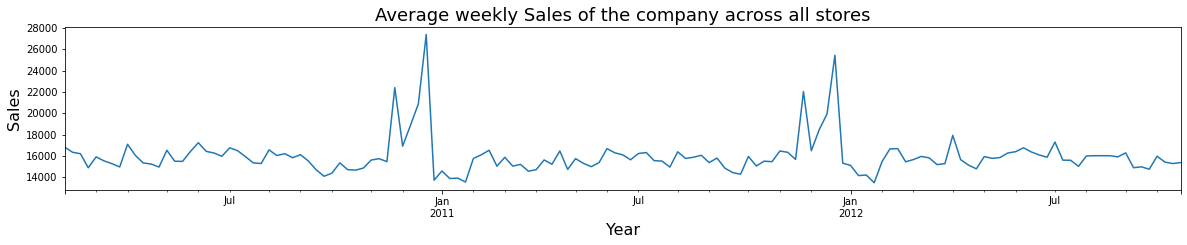

In [ ]:
plt.figure(figsize=(20,3))
Data_train.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Year', fontsize=16);

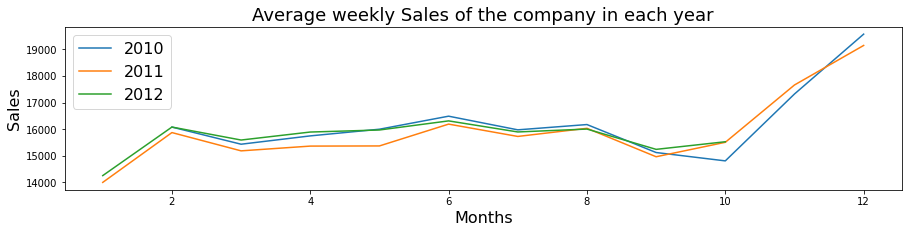

In [ ]:
plt.figure(figsize=(15,3))
Data_train[Data_train['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
Data_train[Data_train['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
Data_train[Data_train['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company in each year', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

In [ ]:
Data_train.Type.value_counts()

1    215478
2    163495
3     42597
Name: Type, dtype: int64

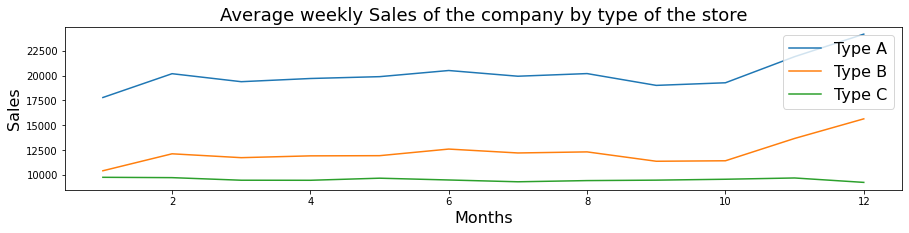

In [ ]:
plt.figure(figsize=(15,3))
Data_train[Data_train['Type']==1].groupby('Month').mean()['Weekly_Sales'].plot()
Data_train[Data_train['Type']==2].groupby('Month').mean()['Weekly_Sales'].plot()
Data_train[Data_train['Type']==3].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company by type of the store', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);


Sale for Type C is almost constant throughout and at its lowest.

Sales of the company see rise during the end of the year for Type A and Type B. Possible reasons could be any tradition or festival in that company.

Type A stores seem to have comparitively high sales. But this can be due to difference in number of stores of different type.

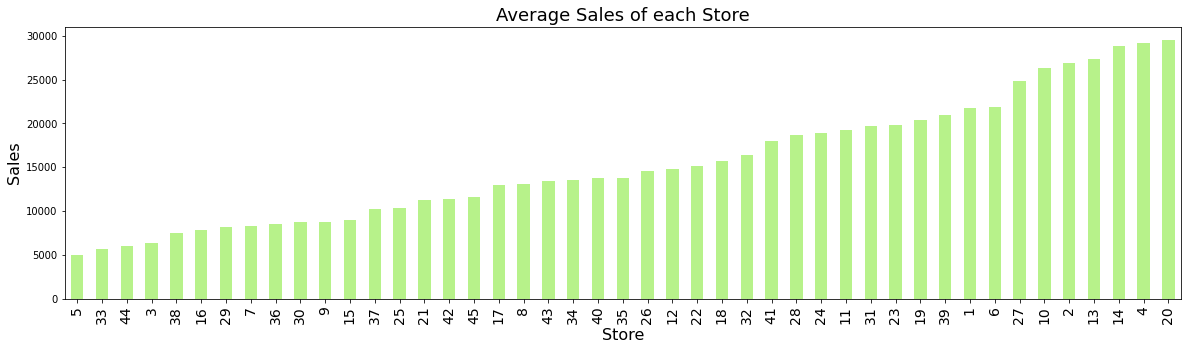

In [ ]:
def average_sales_plot(str):
    plt.figure(figsize=(20,5))
    Data_train.groupby(str).mean()['Weekly_Sales'].sort_values().plot(kind='bar',color='#b7f28a')
    plt.title(f'Average Sales of each {str}', fontsize=18)
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel(str, fontsize=16)
    plt.tick_params(axis='x', labelsize=14)
    
average_sales_plot('Store')

From this graph we can clearly see that the data is seasonal and usually takes a peak arounf December . Let's check out why December is when the sales are the highest in every store 

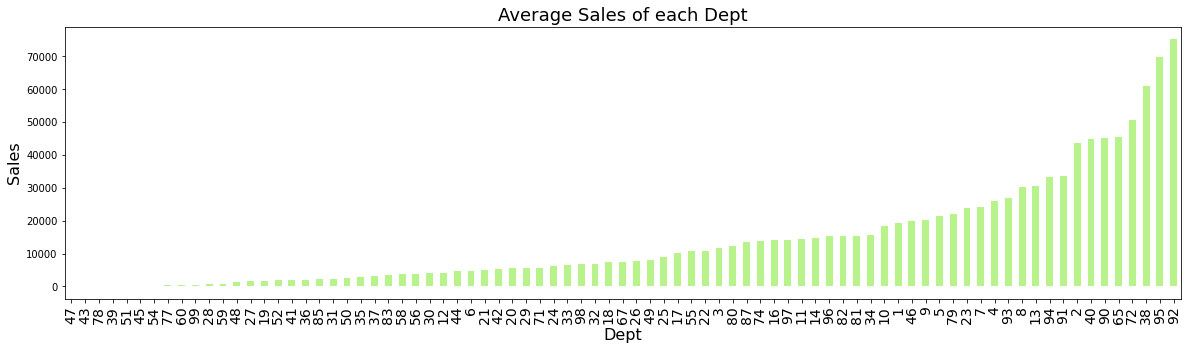

In [ ]:
average_sales_plot('Dept')

Around 10 departments have lowest sales. The company can further analyse as to what are the possible reasons and how it can be improved.

IsHoliday vs Weekly_Sales


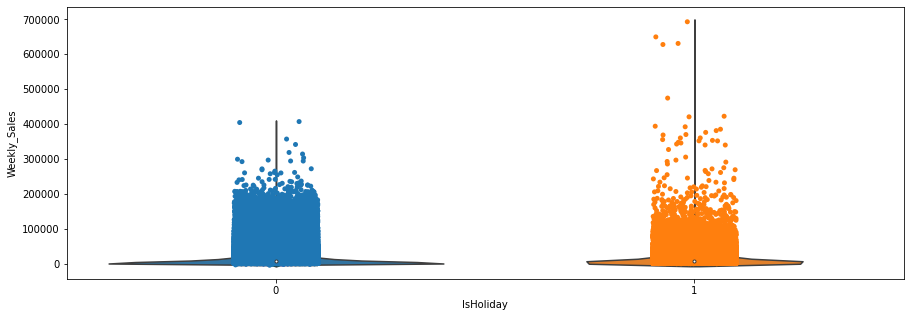

In [ ]:
print('IsHoliday vs Weekly_Sales')
plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
sns.stripplot(y=Data_train['Weekly_Sales'],x=Data_train['IsHoliday'])
# plt.subplot(1,2,2)
sns.violinplot(y=Data_train['Weekly_Sales'],x=Data_train['IsHoliday']);

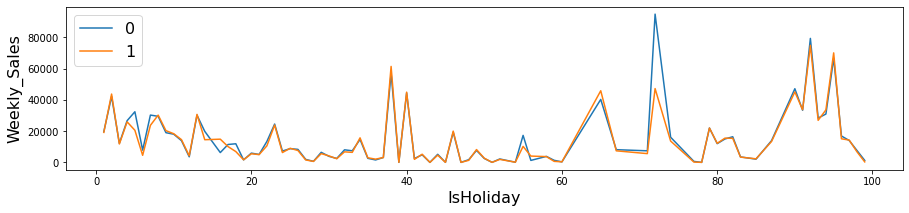

In [ ]:
plt.figure(figsize=(15,3))
Data_train[Data_train['IsHoliday']==1].groupby('Dept').mean()['Weekly_Sales'].plot()
Data_train[Data_train['IsHoliday']==0].groupby('Dept').mean()['Weekly_Sales'].plot()
plt.legend([0, 1], loc='best', fontsize=16)
plt.ylabel('Weekly_Sales', fontsize=16)
plt.xlabel('IsHoliday', fontsize=16);

Highest sales events were recorded in the holiday week.

# We have still some irrelevent features in our dataset we can drop thta features from  it.

In [ ]:
def remove_irrelevent(df):
  df.drop(['Store_dept','Date','Size','Month','Qtr'],axis=1,inplace=True)
  df.reset_index(inplace=True)
  return df

Data_train = remove_irrelevent(Data_train)
Data_test = remove_irrelevent(Data_test)

In [ ]:
Data_train.head()

,index,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,Type,Mean_Of_U_CPI,Year,Week,Day
0,0,1,1,24924.50,0,42.31,2.572,7246.420196,1,219.202358,2010,5,5
1,330761,35,3,14612.19,0,27.19,2.784,7246.420196,2,144.614461,2010,5,5
2,330762,35,4,26323.15,0,27.19,2.784,7246.420196,2,144.614461,2010,5,5
3,330763,35,5,36414.63,0,27.19,2.784,7246.420196,2,144.614461,2010,5,5
4,330764,35,6,11437.81,0,27.19,2.784,7246.420196,2,144.614461,2010,5,5


In [ ]:
dataset = Data_train.copy()

## Train Test Split

In [ ]:
# Import Required Libraries
from sklearn.model_selection import train_test_split

In [ ]:
X=dataset.drop(columns=['Weekly_Sales']).values
y=dataset['Weekly_Sales'].values

In [ ]:
data_test_unseen = Data_test.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# function for displaying score
def evaluation_metrics(y_test,y_pred,X_test):

  print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('R2 Score is:', r2_score(y_test, y_pred))
  print('Adjusted R2 Score is:', 1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

  return ' '

def plot(y_test,y_pred):
  plt.figure(figsize=(15,10))
  plt.plot((y_pred))
  plt.plot((y_test))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('No of Test Data')
  plt.show()

def modeling(model,name):
    
    name = model()
    name.fit(X_train, y_train)
    y_pred = name.predict(X_test)
    y_pred_unseen = name.predict(data_test_unseen)
    score  = evaluation_metrics(y_test,y_pred,X_test)
    plot(y_test,y_pred)
    
    return score, y_pred_unseen

In [ ]:
y_pred

array([32509.3723,  5024.7399,  5024.7399, ...,  6956.0289,  5263.5017,
         758.2936])

Mean Absolute Error: 14740.715915817613
Mean Squared Error: 470158285.87515765
Root Mean Squared Error: 21683.13367286098
R2 Score is: 0.06238528024560208
Adjusted R2 Score is: 0.06229630701625288


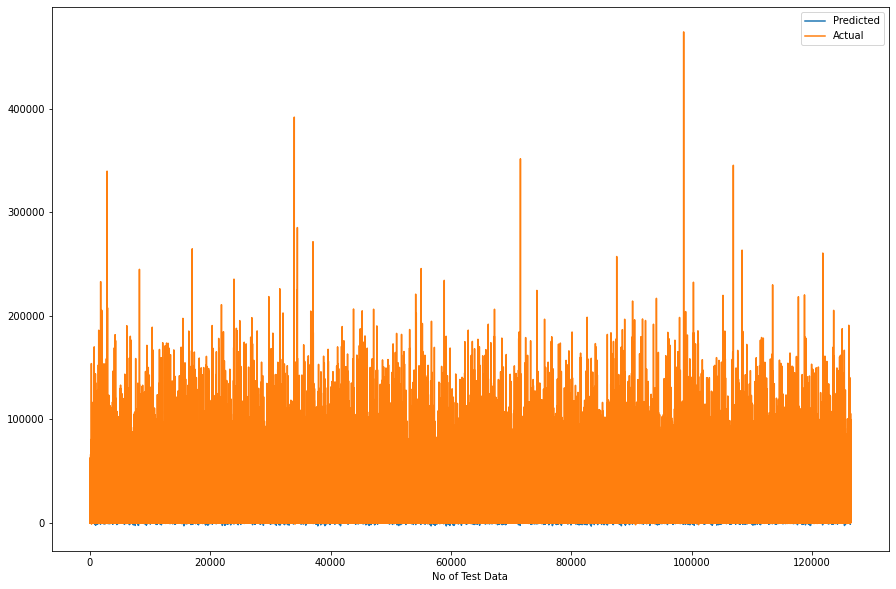

In [ ]:
score,y_pred_unseen = modeling(LinearRegression,'lr')

In [ ]:
y_pred_unseen[0:10]

array([18783.49320445, 41865.89636184, 41642.23282702, 41530.50486334,
       41082.97018625, 40299.62879575, 40187.90083207, 39852.30172612,
       39740.57376244, 39404.97465648])

Mean Absolute Error: 1893.116559211203
Mean Squared Error: 23806763.429216072
Root Mean Squared Error: 4879.217501732842
R2 Score is: 0.952523283133479
Adjusted R2 Score is: 0.9525187779174991


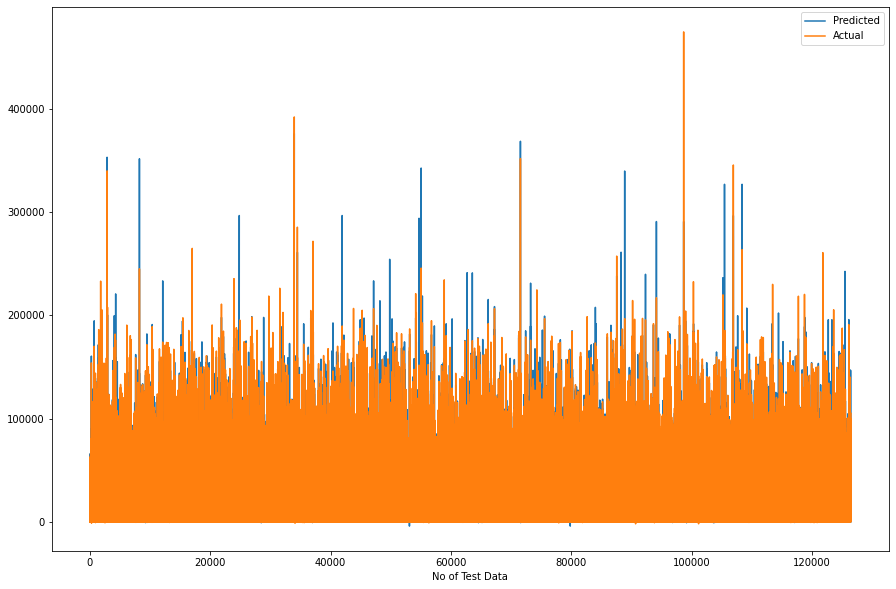

In [ ]:
score,y_pred_unseen = modeling(DecisionTreeRegressor,'dtree')

In [ ]:
y_pred_unseen[0:25]

array([ 5.406010e+04,  3.858556e+04,  6.640325e+04,  3.016430e+03,
        1.230494e+04,  4.320000e+02,  5.686000e+02,  4.103800e+02,
        8.280570e+03,  1.039570e+03,  1.900000e+01,  3.839311e+04,
       -1.500000e+01,  3.507210e+03,  3.507210e+03,  2.172440e+03,
        4.849468e+04,  8.010471e+04,  6.690000e+02,  5.154800e+02,
        4.758247e+04,  1.851633e+04,  1.633475e+04,  1.428942e+04,
        5.149200e+02])

Mean Absolute Error: 1442.7468666057832
Mean Squared Error: 13070853.703837477
Root Mean Squared Error: 3615.363564544716
R2 Score is: 0.973933406683109
Adjusted R2 Score is: 0.9739309331415394


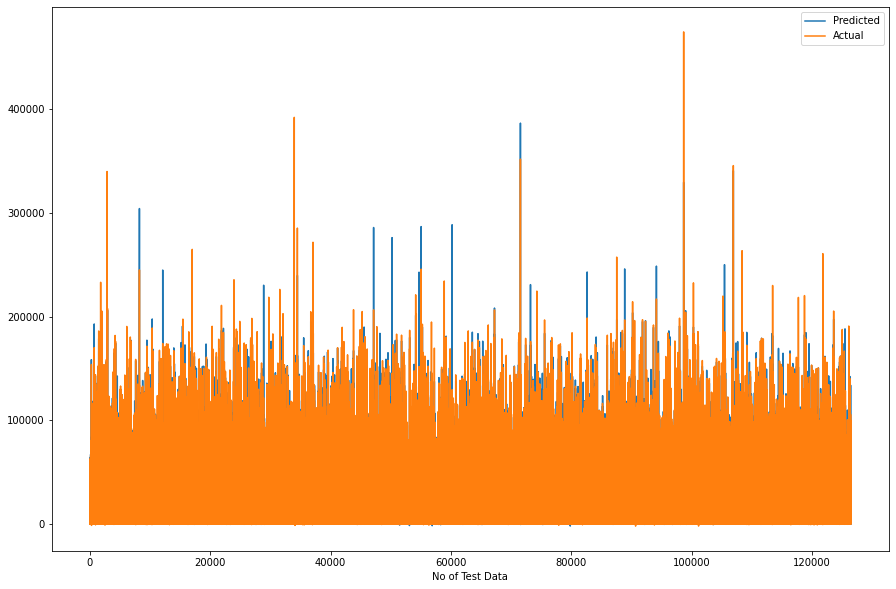

In [ ]:
score,y_pred_unseen = modeling(RandomForestRegressor,'rfr')

In [ ]:
y_pred_unseen[0:25]

array([32201.5404, 18591.7371, 57531.8435, 10619.1142, 18533.3337,
         273.0287,   216.1857,   759.6772,  5627.441 ,  1840.7395,
        1710.11  , 27030.7644,  9879.7867,  6145.3682,  5097.9946,
        7006.8842, 43860.0174, 60791.3797,  2729.4764,  4056.1802,
       38037.7781, 10548.2687, 11005.4181, 19042.9251,   313.1577])

[19:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 7401.20464103549
Mean Squared Error: 142623423.9874883
Root Mean Squared Error: 11942.504929347457
R2 Score is: 0.7155727640457876
Adjusted R2 Score is: 0.7155457738448399


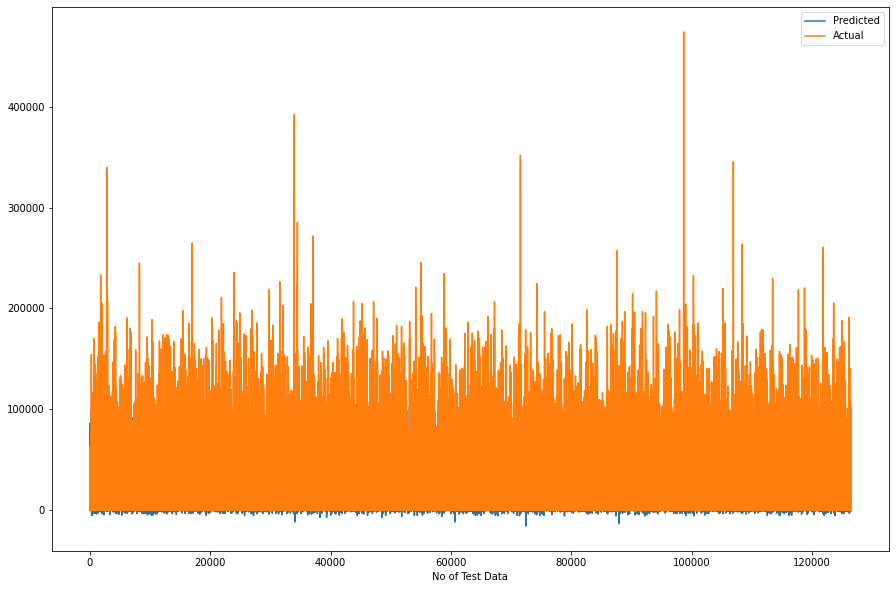

In [ ]:
score,y_pred_unseen = modeling(XGBRegressor,'rfr')

In [ ]:
Final_predicted_weekly_sales = test.copy()

In [ ]:
Final_predicted_weekly_sales['Predicted_weekly_sales'] = y_pred_unseen

In [ ]:
Final_predicted_weekly_sales

,Store,Dept,Date,IsHoliday,Predicted_weekly_sales
0,1,1,2012-11-02,False,32201.5404
1,1,1,2012-11-09,False,18591.7371
2,1,1,2012-11-16,False,57531.8435
3,1,1,2012-11-23,True,10619.1142
4,1,1,2012-11-30,False,18533.3337
...,...,...,...,...,...
115059,45,98,2013-06-28,False,20247.4294
115060,45,98,2013-07-05,False,25342.7977
115061,45,98,2013-07-12,False,17584.7593
115062,45,98,2013-07-19,False,11789.4968


In [ ]:
Final_predicted_weekly_sales.to_csv('/content/drive/MyDrive/Bluepi/Final_predicted_weekly_sales.csv',index=False)

Mean Absolute Error: 1702.4592951838756
Mean Squared Error: 28074639.90338529
Root Mean Squared Error: 5298.550736133919
R2 Score is: 0.9440120563307314
Adjusted R2 Score is: 0.9440071862354407


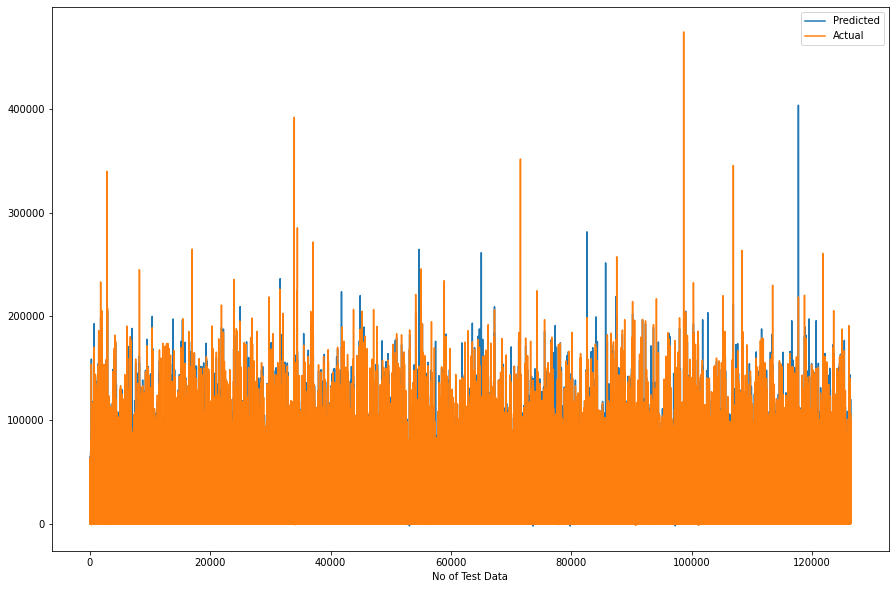

In [ ]:
score,y_pred = modeling(RandomForestRegressor,'rfr')

In [ ]:
y_pred[0:]

array([32509.3723,  5024.7399,  5024.7399, ...,  6956.0289,  5263.5017,
         758.2936])

In [ ]:
df2 = pd.DataFrame(Y_pred_unseen)
df2.to_csv('/content/drive/MyDrive/Bluepi/Y_pred_unseen.csv',index=False)

In [ ]:
df2 = pd.DataFrame(Y_pred_unseen)
df2.to_csv('/content/drive/MyDrive/Bluepi/Y_pred_unseen.csv',index=False)

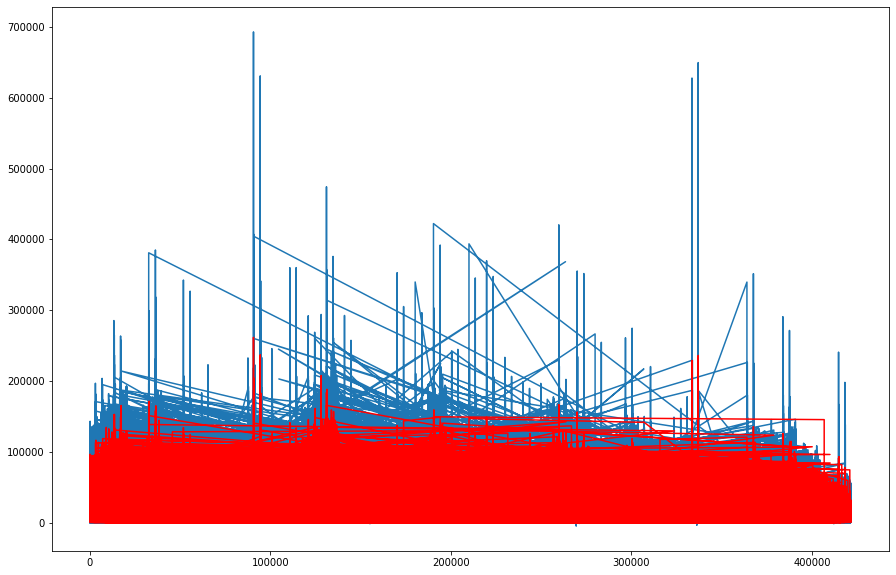

In [ ]:
from matplotlib import pyplot
series = Data_train['Weekly_Sales']
# Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.figure(figsize=(15,10))
series.plot()
rolling_mean.plot(color='red')
pyplot.show()


In [ ]:
y_pred.head()

NameError: ignored